**Telechargement dataset**

In [1]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


**Visualisation des images du dataset**

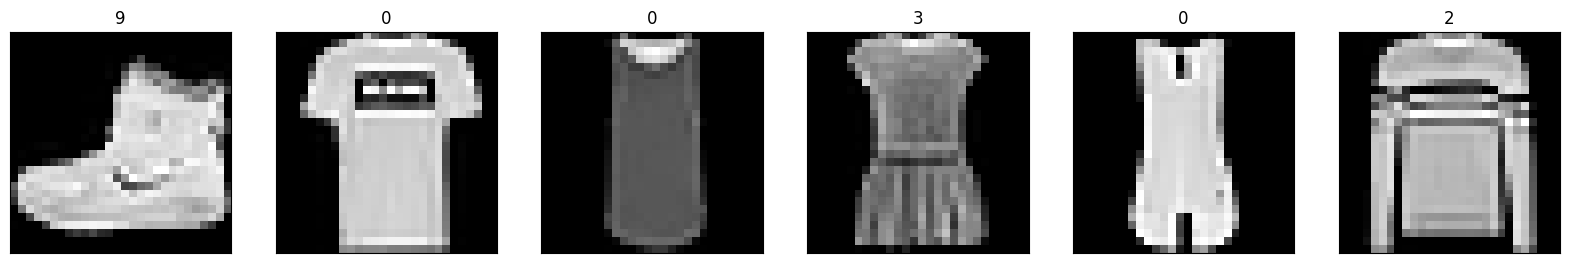

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

**Visualisation de la composition d'une image grayscale (echelle de gris)**

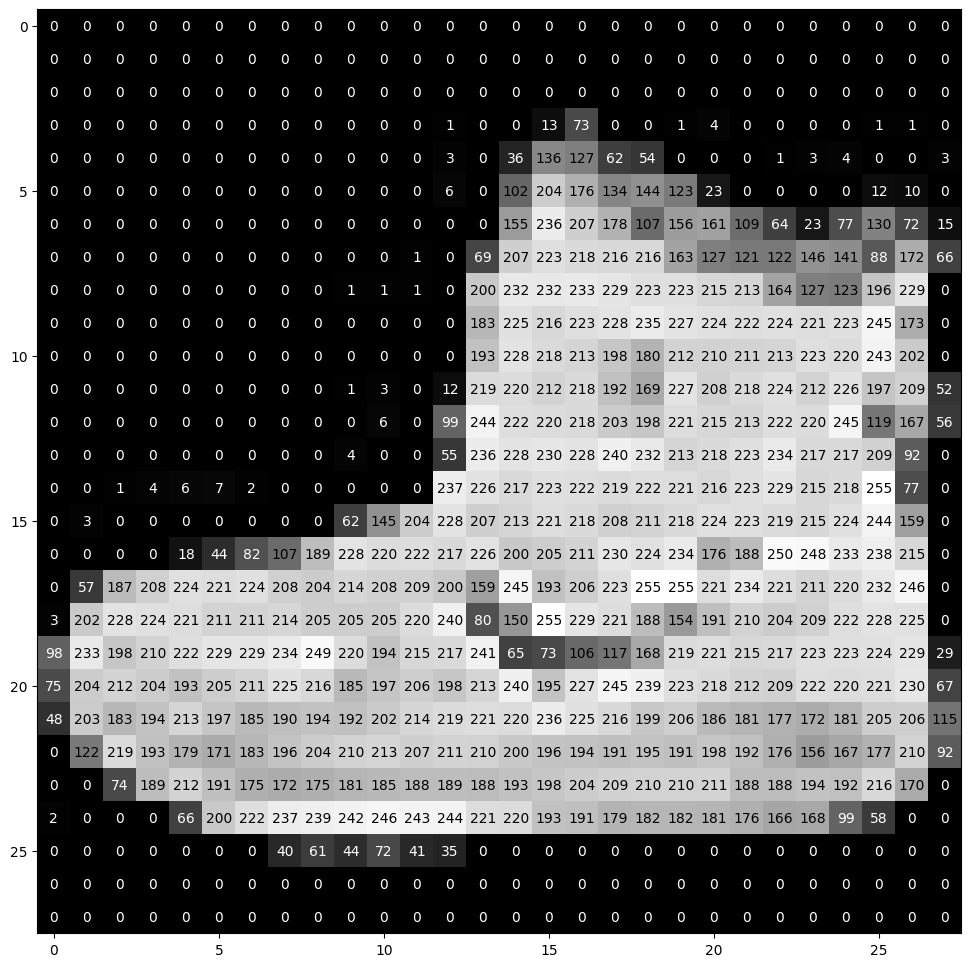

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

**Transformation de [0, 255] ---> [0,1]**

In [4]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


**Convertit un vecteur de classe (nombres entiers) en matrice de classe binaire**

In [5]:
from tensorflow.keras.utils import to_categorical

num_classes = 10 
print('Integer-valued labels:')
print(y_train[:10])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[9 0 0 3 0 2 7 2 5 5]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [6]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


**Architecture du MLP**

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape = (28, 28)))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\PaulE\MachineLearning\localenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [9]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.simple.keras', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=12,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/12

Epoch 1: val_loss improved from inf to 0.40962, saving model to model.weights.simple.keras
1875/1875 - 11s - 6ms/step - accuracy: 0.8202 - loss: 0.4931 - val_accuracy: 0.8561 - val_loss: 0.4096
Epoch 2/12

Epoch 2: val_loss did not improve from 0.40962
1875/1875 - 10s - 5ms/step - accuracy: 0.8613 - loss: 0.3881 - val_accuracy: 0.8553 - val_loss: 0.4711
Epoch 3/12

Epoch 3: val_loss improved from 0.40962 to 0.39964, saving model to model.weights.simple.keras
1875/1875 - 9s - 5ms/step - accuracy: 0.8719 - loss: 0.3654 - val_accuracy: 0.8652 - val_loss: 0.3996
Epoch 4/12

Epoch 4: val_loss did not improve from 0.39964
1875/1875 - 9s - 5ms/step - accuracy: 0.8760 - loss: 0.3553 - val_accuracy: 0.8644 - val_loss: 0.4216
Epoch 5/12

Epoch 5: val_loss did not improve from 0.39964
1875/1875 - 9s - 5ms/step - accuracy: 0.8807 - loss: 0.3434 - val_accuracy: 0.8290 - val_loss: 0.6098
Epoch 6/12

Epoch 6: val_loss did not improve from 0.39964
1875/1875 - 9s - 5ms/step - accuracy: 0.88

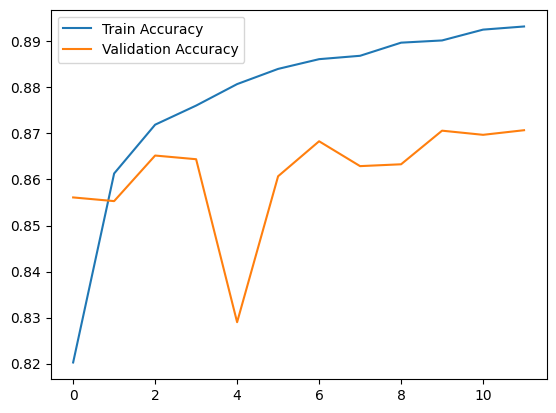

In [10]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [11]:
model.load_weights('model.weights.simple.keras')

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 86.5200%


**Ajout de convolution dans l'architecture du modèle precedent**

In [13]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

In [14]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
           
model2.add(Flatten())    
     
model2.add(Dense(500, activation='relu'))
           
model2.add(Dense(10, activation='softmax'))
           
model2.summary()

C:\Users\PaulE\MachineLearning\localenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │         288,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,926 (1.16 MB)

 Trainable params: 303,926 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.simple.conv.keras', verbose=1, 
                               save_best_only=True)
hist = model2.fit(X_train, y_train, batch_size=32, epochs=12,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/12

Epoch 1: val_loss improved from inf to 0.35370, saving model to model.weights.simple.conv.keras
1875/1875 - 14s - 8ms/step - accuracy: 0.8283 - loss: 0.4700 - val_accuracy: 0.8692 - val_loss: 0.3537
Epoch 2/12

Epoch 2: val_loss improved from 0.35370 to 0.34498, saving model to model.weights.simple.conv.keras
1875/1875 - 12s - 6ms/step - accuracy: 0.8882 - loss: 0.3060 - val_accuracy: 0.8747 - val_loss: 0.3450
Epoch 3/12

Epoch 3: val_loss improved from 0.34498 to 0.27660, saving model to model.weights.simple.conv.keras
1875/1875 - 12s - 6ms/step - accuracy: 0.9015 - loss: 0.2686 - val_accuracy: 0.8985 - val_loss: 0.2766
Epoch 4/12

Epoch 4: val_loss did not improve from 0.27660
1875/1875 - 12s - 6ms/step - accuracy: 0.9098 - loss: 0.2441 - val_accuracy: 0.8936 - val_loss: 0.2941
Epoch 5/12

Epoch 5: val_loss improved from 0.27660 to 0.26292, saving model to model.weights.simple.conv.keras
1875/1875 - 12s - 7ms/step - accuracy: 0.9169 - loss: 0.2265 - val_accuracy: 0.9067 -

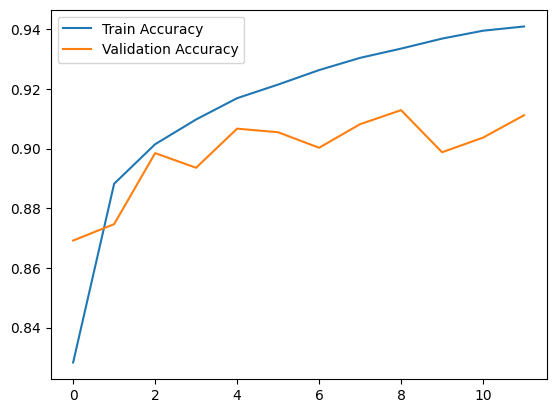

In [17]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [18]:
model2.load_weights('model.weights.simple.conv.keras')

In [19]:
score = model2.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 90.6700%


**CNN With DropOut**

In [20]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [21]:
model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
           
model3.add(Dropout(0.3))
           
model3.add(Flatten())    
     
model3.add(Dense(500, activation='relu'))
model3.add(Dropout(0.4))
           
model3.add(Dense(10, activation='softmax'))
           
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 16)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         288,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,926 (1.16 MB)

 Trainable params: 303,926 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [23]:
checkpointer3 = ModelCheckpoint(filepath='model.weights.conv.dropout.keras', verbose=1, 
                               save_best_only=True)
hist3 = model3.fit(X_train, y_train, batch_size=32, epochs=12,
          validation_data=(X_test, y_test), callbacks=[checkpointer3], 
          verbose=2, shuffle=True)

Epoch 1/12

Epoch 1: val_loss improved from inf to 0.42140, saving model to model.weights.conv.dropout.keras
1875/1875 - 16s - 8ms/step - accuracy: 0.7746 - loss: 0.8181 - val_accuracy: 0.8443 - val_loss: 0.4214
Epoch 2/12

Epoch 2: val_loss improved from 0.42140 to 0.37406, saving model to model.weights.conv.dropout.keras
1875/1875 - 13s - 7ms/step - accuracy: 0.8362 - loss: 0.4604 - val_accuracy: 0.8648 - val_loss: 0.3741
Epoch 3/12

Epoch 3: val_loss did not improve from 0.37406
1875/1875 - 13s - 7ms/step - accuracy: 0.8515 - loss: 0.4217 - val_accuracy: 0.8611 - val_loss: 0.3849
Epoch 4/12

Epoch 4: val_loss improved from 0.37406 to 0.36619, saving model to model.weights.conv.dropout.keras
1875/1875 - 13s - 7ms/step - accuracy: 0.8553 - loss: 0.4136 - val_accuracy: 0.8685 - val_loss: 0.3662
Epoch 5/12

Epoch 5: val_loss did not improve from 0.36619
1875/1875 - 13s - 7ms/step - accuracy: 0.8558 - loss: 0.4108 - val_accuracy: 0.8717 - val_loss: 0.3776
Epoch 6/12

Epoch 6: val_loss di

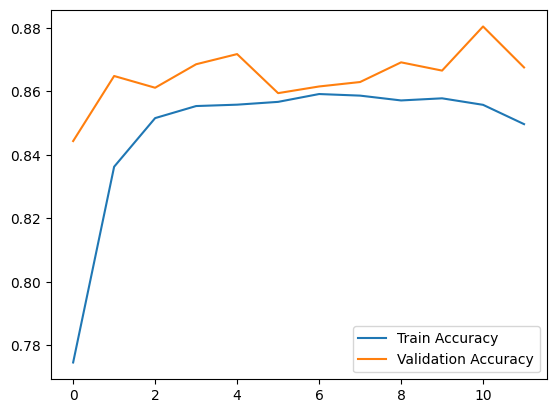

In [24]:
plt.plot(hist3.history['accuracy'], label='Train Accuracy')
plt.plot(hist3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [25]:
model3.load_weights('model.weights.conv.dropout.keras') 

In [26]:
score3 = model3.evaluate(X_test, y_test, verbose=0)
accuracy3 = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy3)

Test accuracy: 90.6700%
